In [4]:
import pandas as pd

data = pd.read_csv("Cleaned_StudentsPerformance.csv")
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3


In [7]:
data['result'] = data['average_score'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')
data[['average_score','result']].head(10)


,average_score,result
0,72.666667,Pass
1,82.333333,Pass
2,92.666667,Pass
3,49.333333,Fail
4,76.333333,Pass
5,77.333333,Pass
6,91.666667,Pass
7,40.666667,Fail
8,65.000000,Pass
9,49.333333,Fail


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['result_encoded'] = le.fit_transform(data['result'])


In [14]:
X = data[['math score','reading score','writing score']]
y = data['result_encoded']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)

print("Logistic Regression Accuracy:", log_acc)


Logistic Regression Accuracy: 1.0


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.985


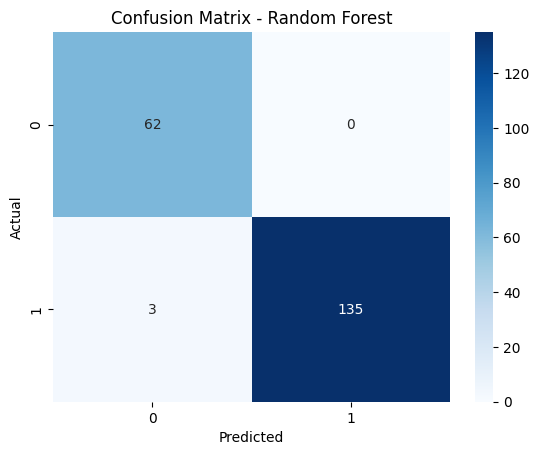

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


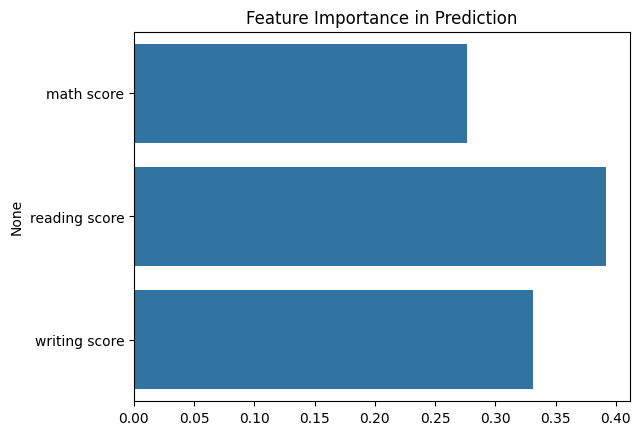

In [21]:
import numpy as np

importances = rf_model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Prediction")
plt.show()


In [19]:
print("Logistic Regression Accuracy:", log_acc)
print("Random Forest Accuracy:", rf_acc)


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 0.985


The Confusion Matrix shows that the Random Forest model correctly identifies Pass and Fail students with high accuracy.

The Feature Importance graph shows that reading and writing scores play a major role in determining overall academic performance, while math score contributes moderately.